In [20]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from dtreeviz.trees import *

In [21]:
data = pd.read_csv('steel_energy_data.csv')
data.head()

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [22]:
data = data.rename(columns={'Lagging_Current_Reactive.Power_kVarh': 'LagReactivePower',
                        'Leading_Current_Reactive_Power_kVarh': 'LeadReactivePower',
                        'Lagging_Current_Power_Factor': 'LagPowerFactor',
                        'Leading_Current_Power_Factor': 'LeadPowerFactor',
                        'CO2(tCO2)':'CO2'})
data.head()

,date,Usage_kWh,LagReactivePower,LeadReactivePower,CO2,LagPowerFactor,LeadPowerFactor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [23]:
ff= data['Day_of_week'].unique()
m = {i:0 for i in ff}
c = 1
for i in ff:
  m[i]+=c
  c+=1
print(m)

{'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}


In [24]:
kk  = []
for i in range(len(data["Day_of_week"])):
  data['Day_of_week'][i] = m[data["Day_of_week"][i]]
data

C:\Users\NARESH KUMAR SAW\AppData\Local\Temp\ipykernel_8044\545868529.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,date,Usage_kWh,LagReactivePower,LeadReactivePower,CO2,LagPowerFactor,LeadPowerFactor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,1,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,1,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,1,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,1,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,1,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,1,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,1,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,1,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,1,Light_Load


In [25]:
X = data[["LagReactivePower","LeadReactivePower", "LagPowerFactor","LeadPowerFactor","Usage_kWh","Day_of_week"]]
X

,LagReactivePower,LeadReactivePower,LagPowerFactor,LeadPowerFactor,Usage_kWh,Day_of_week
0,2.95,0.00,73.21,100.00,3.17,1
1,4.46,0.00,66.77,100.00,4.00,1
2,3.28,0.00,70.28,100.00,3.24,1
3,3.56,0.00,68.09,100.00,3.31,1
4,4.50,0.00,64.72,100.00,3.82,1
...,...,...,...,...,...,...
35035,4.86,0.00,62.10,100.00,3.85,1
35036,3.74,0.00,70.71,100.00,3.74,1
35037,3.17,0.07,76.62,99.98,3.78,1
35038,3.06,0.11,77.72,99.96,3.78,1


In [26]:
Y = data["Load_Type"]
Y

0        Light_Load
1        Light_Load
2        Light_Load
3        Light_Load
4        Light_Load
            ...    
35035    Light_Load
35036    Light_Load
35037    Light_Load
35038    Light_Load
35039    Light_Load
Name: Load_Type, Length: 35040, dtype: object

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =  train_test_split(X,Y,test_size = 0.25, random_state= 0)

In [28]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
classifier = classifier.fit(X_train,Y_train)

In [30]:
Y_pred = classifier.predict(X_test)
from sklearn import metrics 
print('Accuracy Score:', metrics.accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7243150684931506


In [31]:
classifier.predict([[3.02,0.07,77.22,99.98, 3.67, 1]])

array(['Maximum_Load'], dtype=object)

In [32]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)


Confusion matrix

 [[3990  224  333]
 [ 150 1482  164]
 [ 307 1237  873]]


In [33]:
from sklearn import tree
##tree.plot_tree(classifier.fit(X_train, Y_train))

In [34]:
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_4 <= -0.67
|   |--- feature_1 <= 0.32
|   |   |--- feature_4 <= -0.72
|   |   |   |--- class: Light_Load
|   |   |--- feature_4 >  -0.72
|   |   |   |--- class: Light_Load
|   |--- feature_1 >  0.32
|   |   |--- feature_5 <= 1.25
|   |   |   |--- class: Medium_Load
|   |   |--- feature_5 >  1.25
|   |   |   |--- class: Light_Load
|--- feature_4 >  -0.67
|   |--- feature_2 <= 0.12
|   |   |--- feature_4 <= 0.43
|   |   |   |--- class: Light_Load
|   |   |--- feature_4 >  0.43
|   |   |   |--- class: Light_Load
|   |--- feature_2 >  0.12
|   |   |--- feature_1 <= 0.19
|   |   |   |--- class: Maximum_Load
|   |   |--- feature_1 >  0.19
|   |   |   |--- class: Medium_Load



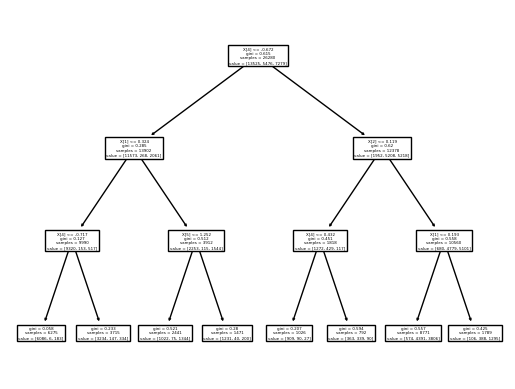

In [35]:
tree.plot_tree(classifier);